# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress
%matplotlib inline

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
City_New = []
Lat = []
Lng = []
Temp = []
Humidity = []
Cloudiness = []
Wind = []
Country = []
Date = []

records = 0
sets = 0
import sys
print('------------------------')
print('Beginning Data Retrieval')
print('------------------------')
# Loop through the list of cities and perform a request for data on each
for city in cities:
    # Build partial query URL
    query_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    response = requests.get(query_url).json()
    records += 1
 
    print(f"Processing record {records} of Set {sets}|{city}")
    try:         
        #print(f"Processing record {records} of Set {sets}|{city}")
        Lat.append(response["coord"]['lat'])
        Lng.append(response["coord"]["lon"])
        Temp.append(response['main']['temp_max'])
        Humidity.append(response['main']['humidity'])
        Cloudiness.append(response['clouds']['all'])
        Wind.append(response['wind']['speed'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        City_New.append(response["name"])
        time.sleep(1.5)
    except:
        print(f"City not found.")
        time.sleep(1.5)
print('------------------------')
print('End Data Retrieval')
print('------------------------')


------------------------
Beginning Data Retrieval
------------------------
Processing record 1 of Set 0|arraial do cabo
Processing record 2 of Set 0|vestmannaeyjar
Processing record 3 of Set 0|natal
Processing record 4 of Set 0|namatanai
Processing record 5 of Set 0|kavaratti
Processing record 6 of Set 0|triunfo
Processing record 7 of Set 0|shatin
Processing record 8 of Set 0|illoqqortoormiut
City not found.
Processing record 9 of Set 0|ust-tsilma
Processing record 10 of Set 0|roebourne
Processing record 11 of Set 0|xuddur
Processing record 12 of Set 0|hobart
Processing record 13 of Set 0|torbay
Processing record 14 of Set 0|rikitea
Processing record 15 of Set 0|dikson
Processing record 16 of Set 0|albany
Processing record 17 of Set 0|saint george
Processing record 18 of Set 0|east london
Processing record 19 of Set 0|mount gambier
Processing record 20 of Set 0|emmett
Processing record 21 of Set 0|punta arenas
Processing record 22 of Set 0|malinovskiy
Processing record 23 of Set 0|biri

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_dict = {
    "City": City_New,
    "Lat": Lat,
    "Lng": Lng,
    "Max Temp": Temp,
    "Humidity": Humidity,
    "Cloudiness": Cloudiness,
    "Wind Speed": Wind,
    "Country": Country,
    "Date": Date
}
weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv(r"Output/fileOne.csv", index=False, header=True)

In [6]:
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Arraial do Cabo,-22.9661,-42.0278,89.60,74,20,9.22,BR,1616946456
1,Vestmannaeyjar,63.4427,-20.2734,35.60,64,20,11.50,IS,1616946735
2,Natal,-5.7950,-35.2094,87.80,66,40,5.75,BR,1616946737
3,Namatanai,-3.6667,152.4333,79.03,79,100,8.16,PG,1616946739
4,Kavaratti,10.5669,72.6420,84.20,73,100,7.96,IN,1616946740


In [7]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,5.640000e+02
mean,17.428587,13.972767,60.709894,68.670213,54.101064,8.801152,1.616947e+09
std,32.851797,89.331205,26.073748,23.277256,38.241804,6.012583,3.283872e+02
min,-54.800000,-179.166700,-29.200000,3.000000,0.000000,0.290000,1.616946e+09
25%,-9.699350,-61.522525,46.400000,55.000000,20.000000,4.000000,1.616947e+09
50%,18.296450,16.713400,68.790000,73.000000,61.500000,7.450000,1.616947e+09
75%,43.973050,92.116475,79.997500,87.000000,92.000000,11.927500,1.616948e+09
max,78.218600,179.316700,107.600000,100.000000,100.000000,33.380000,1.616948e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [8]:
date =datetime.datetime.fromtimestamp(
        int(weather_data['Date'][0])
    ).strftime('%m/%d/%Y')

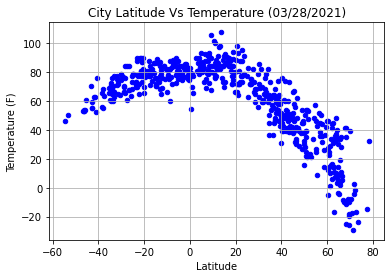

In [9]:
weather_data.plot(kind='scatter',x='Lat',y='Max Temp', c='b')
plt.title('City Latitude Vs Temperature ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.savefig("Figures/latVstmp.png")
plt.grid();

* There seems to be a correlation between latitude of the city and the temperature, so the cities in the southern hemisphere have warmer temperatures, especially those closest to the equator 

## Latitude vs. Humidity Plot

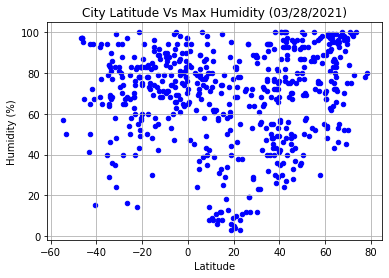

In [10]:
weather_data.plot(kind='scatter',x='Lat',y='Humidity', c='b')
plt.title('City Latitude Vs Max Humidity ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("Figures/latVsHumidity.png")
plt.grid();

* humidity seems to vary no matter where the city is located

## Latitude vs. Cloudiness Plot

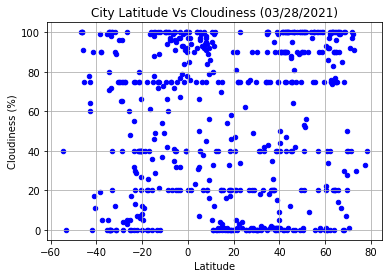

In [11]:
weather_data.plot(kind='scatter',x='Lat',y='Cloudiness', c='b')
plt.title('City Latitude Vs Cloudiness ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig("Figures/latVsCloudiness.png")
plt.grid();

* I see no correlation between latitude and cloudiness either.  See same points in latitude and cloudiness varies from none to a lot. 

## Latitude vs. Wind Speed Plot

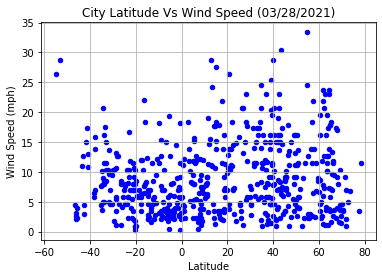

In [12]:
weather_data.plot(kind='scatter',x='Lat',y='Wind Speed', c='b')
plt.title('City Latitude Vs Wind Speed ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig("Figures/latVsWind.png")
plt.grid();

* as with the previous three plots I don't see any distinct correlation between latitude and wind speed.  

## Linear Regression

In [13]:
northern_df = weather_data.loc[weather_data["Lat"] >= 0,:]
southern_df = weather_data.loc[weather_data["Lat"] < 0,:]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

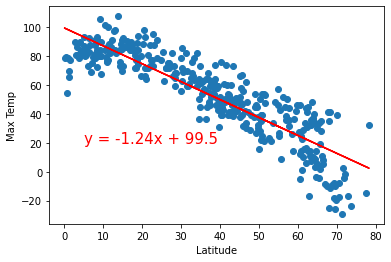

The r-value is: -0.8815438591241244


In [14]:
x_values = northern_df["Lat"]
y_values = northern_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(5,20),fontsize=15,color="red")
plt.savefig("Figures/NorthRegression1.png")
plt.show();
print(f"The r-value is: {rvalue}")

* there is a strong correlation here.  The cities closer to the equator will have a higher max temperature. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

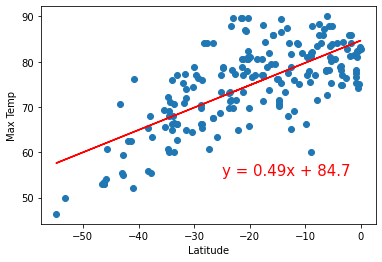

The r-value is: 0.6940163786124766


In [15]:
x_values = southern_df["Lat"]
y_values = southern_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(-25,55),fontsize=15,color="red")
plt.savefig("Figures/southernRegression1.png")
plt.show();
print(f"The r-value is: {rvalue}")

* perhaps I had more cities in the northern hemisphere because I would have thought a higher r-value would occur.  But there does still be a strong correlation that the further away from the equator one gets the colder the max temp

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

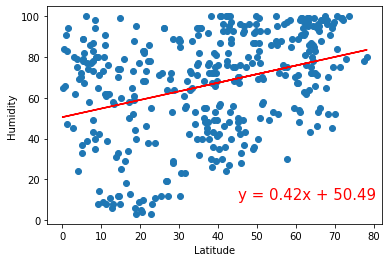

The r-value is: 0.3392156871153811


In [16]:
x_values = northern_df["Lat"]
y_values = northern_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.savefig("Figures/northernRegression2.png")
plt.show();
print(f"The r-value is: {rvalue}")

* very slight slope and r-value is low.  to the eye almost see the same points above and below the regression line. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

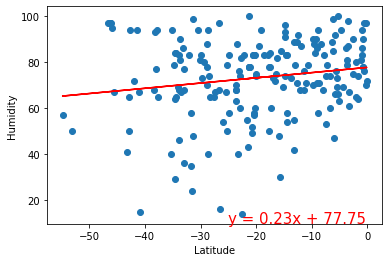

The r-value is: 0.16971254884474835


In [17]:
x_values = southern_df["Lat"]
y_values = southern_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")
plt.savefig("Figures/southernRegression2.png")
plt.show();
print(f"The r-value is: {rvalue}")

* in the soutthern hemisphere again the closer to the equator the more humidity but still varies a lot with some very low at the same latitude.  Very low r-value suggests there is no true correlation

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

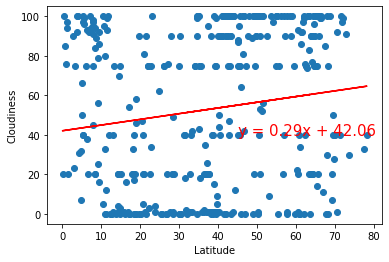

The r-value is: 0.15027628423265516


In [18]:
x_values = northern_df["Lat"]
y_values = northern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(45,40),fontsize=15,color="red")
plt.savefig("Figures/northernRegression3.png")
plt.show();
print(f"The r-value is: {rvalue}")

* cloudiness varies throughout, no matter the latitude

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

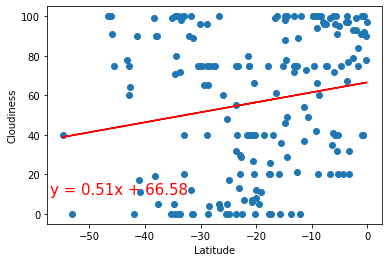

The r-value is: 0.18287091719876575


In [19]:
x_values = southern_df["Lat"]
y_values = southern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(-57,10),fontsize=15,color="red")
plt.savefig("Figures/sourthernRegression3.png")
plt.show();
print(f"The r-value is: {rvalue}")

* similar the the northern hemisphere, the cloudiness varies throughout no matte rthe lattitude.  There does seem to be more bunched up in general between 0 and -10 but again, varries from none to 100. Nothing tells me living in a certain city will give me less clouds on any particular day.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

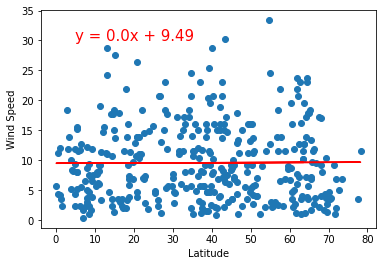

The r-value is: 0.007303224769295453


In [20]:
x_values = northern_df["Lat"]
y_values = northern_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(5,30),fontsize=15,color="red")
plt.savefig("Figures/northernRegression4.png")
plt.show();
print(f"The r-value is: {rvalue}")

*virtually no correlation at all between latitude and wind speed, as the straight line would indicate

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

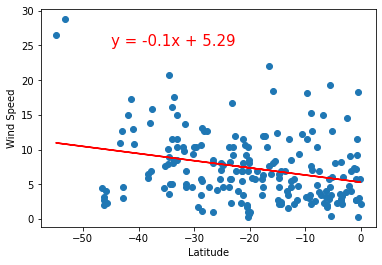

The r-value is: -0.27260070721059376


In [21]:
x_values = southern_df["Lat"]
y_values = southern_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(-45,25),fontsize=15,color="red")
plt.savefig("Figures/northernRegression4.png")
plt.show();
print(f"The r-value is: {rvalue}")

* slight negative regression line seems to indicate less windy conditions as we get closer to the equator